# Neural Networks to Solve the XOR Problem
## Gary Lawson - 12 April 2019

### Introduction: Defining the XOR Problem

To develop an approach to solving the XOR problem, I first needed to understand what the XOR problem was.  So let's begin with the title itself.  The term XOR is short for "Exclusive Or", meaning that the problem results in one single answer from a selection of possible answers.  The relationship between the possible answers is exclusively an "or" statement, meaning from the possible answers of A and B, the answer can only be "A or B", and cannot be "A and B" or "neither A nor B".  To put a visual behind this, the figure below is a simple binary example of the XOR problem where we have 4 possible binary input combinations shown by the (x,y) coordinates that result in a binary output (two possible answers).  Applying the understanding of the XOR problem to this data tells us that with the 4 possible binary input combinations, we can only have one answer, and it will be exclusively a "blue" outcome or a "yellow" outcome (blue = 0 and yellow = 1 in a binary configuation).  This shows that when the input values are equal to each other (e.g. (0,0)), then the output is blue, but when the input values are not equal (e.g. (1,0)), then the output is yellow.

![](XOR_Problem_Keras_Fig_1.PNG)

So what is the relevance of this simple problem?  Well, it is relatively easy for us as humans to pick out how to separate these two colors based on their position on the graph, but has proven to a challenge for computers to solve on their own as Minksy and Papert (1969) showed in their research.  The reason behind the challenge is machine learning often uses mathematics to make a linear division of the data to provide a predicted outcome.  When thinking about this linear division geometrically, this means that the problem cannot be solved using a single hyperplane that partions the data.  When looking at the left side of the figure below, it can be seen that it is impossible to divide the blue from the yellow in a way that meets the XOR goal of "blue or yellow", as any division will always have one wrong answer.  So from a mathematical standpoint, the solution to the problem is at least two linear lines creating boundaries to classify the outputs.  This is shown in the figure on the right below.

![](XOR_Problem_Keras_Fig_2.PNG)

Initial work on neural networks consisted of a single preceptron limited to forward propagation.  This means that two inputs were directly connected to an output, and was was shown to be inadequate to solve this problem.  The reason why a single preceptron makes it impossible to solve this problem is because applying weights and a bias to the connections between the two inputs and the output result in *one* linear equation.  This is shown in the figure below.  The inputs are shown as the variable I, the weights are shown by the variable w, the bias is shown as the variable b, and the output is shown as the variable Out. 

![](XOR_Problem_Keras_Fig_3.PNG)

Enter the hidden layer!  Neural network research was jumpstarted again when the concept of hidden layers were discovered, which can also be called Multilayer Preceptrons (MLP).  By adding additional layers with more than one node to the problem, one could visualize this as additional linear hyperplanes being created to help accurately predict a solution.  The figure below shows a simple MLP that can be thought of as creating two linear hyperplanes that accept the two available inputs and provide a way to predict a single output.  The inputs are shown as the variable I, the weights for the input-to-hidden and hidden-to-output connections are shown by the variables w and v respectively, the bias is shown as the variable b, and the output is shown as the variable Out. While in the end the Output node will sum the values received from the two hidden layer nodes, I believe this is in effect providing the two linear hyperplanes for decision making.  It is also my understanding that by adding additional nodes to the hidden layer is analogous to adding additional linear hyperplanes to the solution.

But without backpropogation, the probability of this neural network solving the XOR problem is extremely small.  Because the connection weights and bias' are all generated randomly, backpropogation is needed to continuously learn how to move the linear hyperplanes around until a solution is identified.

![](XOR_Problem_Keras_Fig_4.PNG)

### Solving the Problem using Keras

To try and solve this problem I used a Keras model to loop through several different parameters to a) find a solution and b) begin to zero in on the best solution.  In the loops, I looked at the node activation function (sigmoid and relu), the loss function (mean_squared_error and binary_crossentropy), and the optimizer (SDG and Adam).  I kept my number of epochs constant at 5000 as well as one single hidden layer with only two nodes.

In [1]:
#Import packages

import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
import matplotlib.pyplot as plt  # static plotting
import pandas as pd

from numpy.random import seed
from tensorflow import set_random_seed
import random as rn

Using TensorFlow backend.


In [2]:
# Define a function to plot Model Accuracy and Model Loss

def plot_figs(binary_accuracy, loss, hidden_activation, loss_var, optimizer_var):
    # Plot the training history
    plt.figure(figsize=(15,3))

    #print(history.history.keys())
    plt.subplot(1,2,1)
    plt.plot(history.history[binary_accuracy])
    plt.title('Model Accuracy for %r, %r, %r' %(hidden_activation, loss_var, optimizer_var))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history[loss])
    plt.title('Model Loss for %r, %r, %r' %(hidden_activation, loss_var, optimizer_var))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper right')

In [3]:
# Create a datase of the four different states of the XOR gate
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# Create the results of the the four datasets above in the same order
target_data = np.array([[0],[1],[1],[0]], "float32")

In [4]:
# Set parameters to loop through

hidden_activation = ['sigmoid','relu']
loss_var = ['mean_squared_error', 'binary_crossentropy']
optimizer_var = ['sgd','adam']
num_epochs = 5000

---------------------------------------------------------------
Hidden Layer Activiation: 'sigmoid'
Hidden Layer Loss Function: 'mean_squared_error'
Hidden Layer Optimizer: 'sgd'
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Configuration Accuracy: [0.5]
---------------------------------------------------------------
Hidden Layer Activiation: 'sigmoid'
Hidden Layer Loss Function: 'mean_squared_error'
Hidden Layer Optimizer: 'adam'
Configuration Accuracy: [1.0]
---------------------------------------------------------------
Hidden Layer Activiation: 'sigmoid'
Hidden Layer Loss Function: 'binary_crossentropy'
Hidden Layer Optimizer: 'sgd'
Configuration Accuracy: [0.5]
---------------------------------------------------------------
Hidden Layer Activiation: 'sigmoid'
Hidden Layer Loss Function: 'binary_crossentropy'
Hidden Layer Optimizer: 'adam'
Configuration Accuracy: [1.0]
----------------------------------------

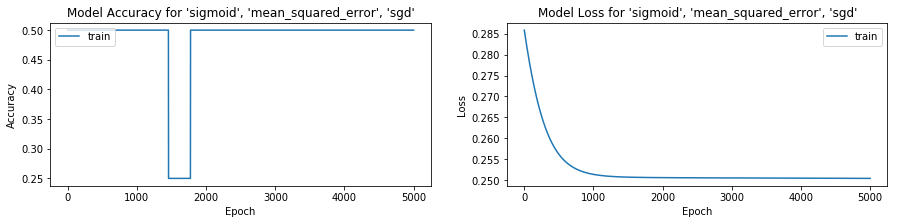

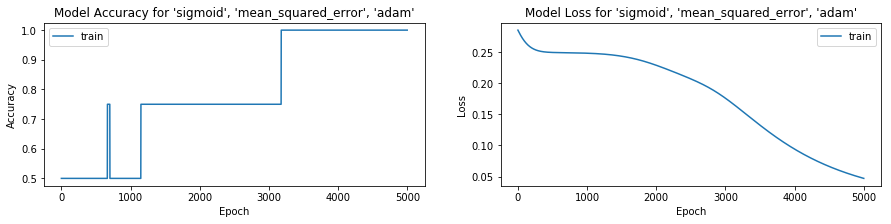

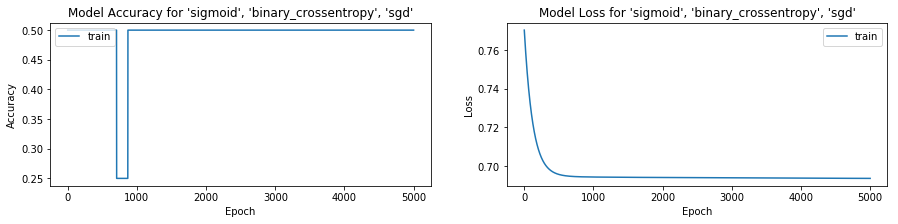

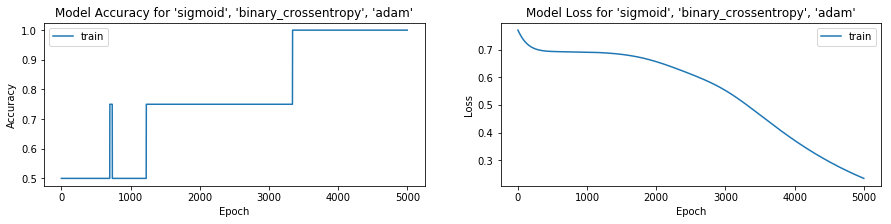

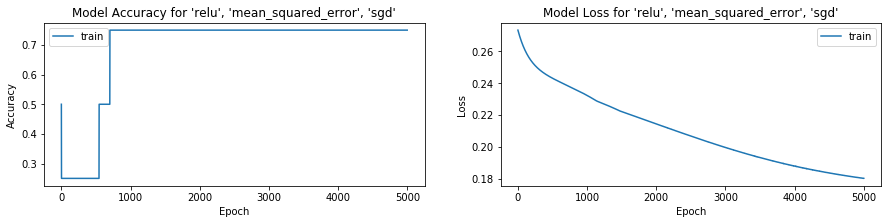

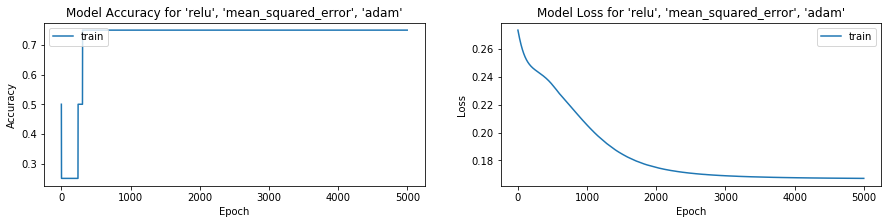

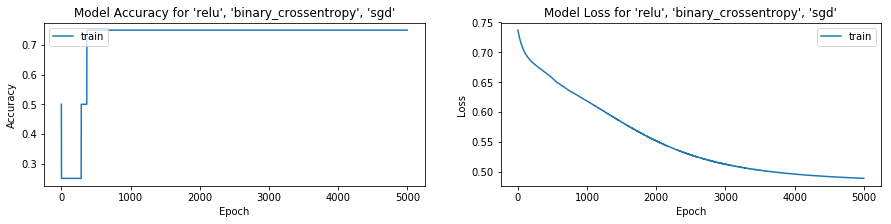

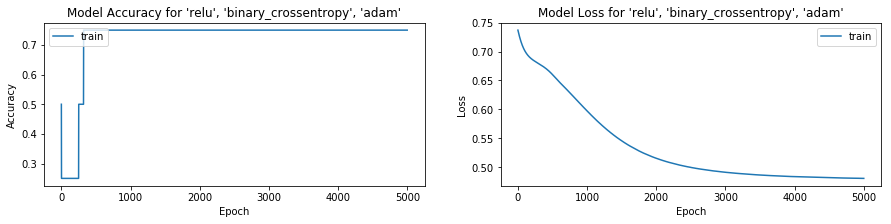

In [5]:
# Create a loop that uses Keras to model all model combinations to look for optimal model to solve XOR problem

for act in hidden_activation:
    for l in loss_var:
        for opt in optimizer_var:
    
            print('---------------------------------------------------------------')    
            print("Hidden Layer Activiation: %r" %act)
            print("Hidden Layer Loss Function: %r" %l)
            print("Hidden Layer Optimizer: %r" %opt)

            # Set seeds for reproducible results
            seed(1)
            set_random_seed(2)
            rn.seed(3)
            
            # Create Model
            model = Sequential()
            model.add(Dense(2, input_dim=2, activation=act))
            model.add(Dense(1, activation='sigmoid'))

            model.compile(loss=l,
                          optimizer=opt,
                          metrics=['binary_accuracy'])
            
            # Fit the model and create a histry for evaluation
            history = model.fit(training_data, target_data, epochs=num_epochs, verbose=0)
            #model.summary()
            #model.get_weights()
            evalu = model.evaluate(training_data, target_data, verbose=0)
            
            # Plot figures
            plot_figs('binary_accuracy', 'loss', act, l, opt)
            
            # Print accuracy
            print("Configuration Accuracy: %r" %evalu[1:])


### Results and Conclusion

The results of this experiment did in fact yield a model that consistently can predict the outcome of the XOR problem with 100% accuracy.  This means that using a MLP and backpropogation, it is possible to find a machine learning solution that uses at least two linear boundaries to predict the outcome of this problem.

I also found that the Adam optimizer coupled with the Sigmoid activation function was the most effective.  I believe this is due to the smooth binary output provided by the Sigmoid activation function and the auto-updated learning rate that the Adam optimizer implements.  The relu activation function using any combination of optimizer and loss function appeared to do moderately well, but was only able to achieve a 75% accuracy.  Also, I found that the loss function appeared to play little role in the ability to learn a solution.

Some other things to consider is the number of epochs used as well as the number of nodes in the hidden layer.  Starting with the number of epochs, I was able to find a solution in just over 3000 epochs as shown in the figures above.  Because the epochs are really where backpropogation allows the model to *learn* the data, more epochs could have resulted in some of my other model combinations finding a successful solution.  Also, adding additional linear boundaries to the problem through additional nodes in the hidden layer would most likely speed up the process (reduced number of epochs) to identify a solution because more boundaries constantly being updated through backpropogation will help to exclusively divide this XOR problem quicker than just two boundaries.

### References

Maren, A. (Draft 2019). *Statistical Mechanics, Neural Networks, and Artificial Intelligence*. Not Yet Published.

Minsky, M., & Papert, S. (1969). *Perceptrons: An Introduction to Computational Geometry*. Oxford, England: M.I.T. Press.

Exclusive-or. (n.d.). Retrieved April 12, 2019 from Wikipedia: https://en.wikipedia.org/wiki/Exclusive_or

C Burgdorf. (2016, November 2). Understanding XOR with Keras and Tensorflow. Retrieved from https://blog.thoughtram.io/machine-learning/2016/11/02/understanding-XOR-with-keras-and-tensorlow.html

J Ahire Burgdorf. (2017, December 26). Understanding XOR with Keras and Tensorflow. Retrieved from https://medium.com/@jayeshbahire/the-xor-problem-in-neural-networks-50006411840b

L Araújo. (2018, March 25). Solving XOR with a single Perceptron: Advocating for polynomial transformations as a way to increase the representational power of artificial neurons. Retrieved from https://medium.com/@lucaspereira0612/solving-xor-with-a-single-perceptron-34539f395182